# Insurance Dataset

## Importing Libraries and Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


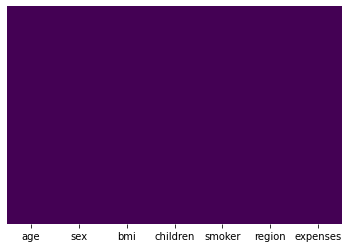

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

So, There are no null values in the Dataset

## Feature Engineering

In [ ]:
## For Sex Column
def change(col):
  if col == 'male':
    return 1
  else:
    return 0

df['sex'] = df['sex'].apply(change)
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [ ]:
## For Smoker Column
def convert(col):
  if col == 'yes':
    return 1
  else:
    return 0

df['smoker'] = df['smoker'].apply(convert)
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [ ]:
## For Region Column
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
def transform(col):
  if col == 'southwest':
    return 0
  elif col == 'southeast':
    return 1
  elif col == 'northwest':
    return 2
  else:
    return 3

df['region'] = df['region'].apply(transform)
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


In [ ]:
X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values

In [ ]:
print(X)

[[19.   0.  27.9  0.   1.   0. ]
 [18.   1.  33.8  1.   0.   1. ]
 [28.   1.  33.   3.   0.   1. ]
 ...
 [18.   0.  36.9  0.   0.   1. ]
 [21.   0.  25.8  0.   0.   0. ]
 [61.   0.  29.1  0.   1.   2. ]]


In [ ]:
print(y)

[16884.92  1725.55  4449.46 ...  1629.83  2007.95 29141.36]


In [ ]:
y=y.reshape(len(y),1)

In [ ]:
print(y)

[[16884.92]
 [ 1725.55]
 [ 4449.46]
 ...
 [ 1629.83]
 [ 2007.95]
 [29141.36]]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training Models

### 1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred1 = regressor1.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred1))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred1)))
print('R squared Error: ',r2_score(y_test, y_pred1))

Mean Absolute Error: 3930.2173746197864
Mean Squared Error: 31841055.88854044
Mean Root Squared Error: 5642.787953533292
R squared Error:  0.7999053396503137


### 2. Support Vector Regression

In [ ]:
y = y.reshape(len(y),1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
## Feature Scalling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_train1 = sc_x.fit_transform(X_train)
y_train1 = sc_y.fit_transform(y_train)

In [ ]:
from sklearn.svm import SVR
regressor2 = SVR(kernel = 'rbf')
regressor2.fit(X_train1,y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred2 = sc_y.inverse_transform(regressor2.predict(sc_x.transform(X_test)).reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred2))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred2)))
print('R squared Error: ',r2_score(y_test, y_pred2))

Mean Absolute Error: 2412.9007516781876
Mean Squared Error: 17550340.215712886
Mean Root Squared Error: 4189.312618522624
R squared Error:  0.8897106497731322


### 3. KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regressor3 = KNeighborsRegressor(n_neighbors=3)
regressor3.fit(X_train1, y_train1)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_pred3 = sc_y.inverse_transform(regressor3.predict(sc_x.transform(X_test)).reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred3))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred3)))
print('R squared Error: ',r2_score(y_test, y_pred3))

Mean Absolute Error: 3067.1477238805974
Mean Squared Error: 24300699.709655933
Mean Root Squared Error: 4929.573988658242
R squared Error:  0.8472902320926703
